# Aviation Accident Analysis

This notebook looks into using various python-based data science libraries in an attempt to build a visualization report to understand what are the principal features that are involved in a comercial aviation accident.

The approach taken is the following:

## 1. Problem definition

Like in any other industry, the aviation industry has suffered tragic events and accidents, some finish with fatal casualties.
After accident investigation is completed a preliminary report with the flight conditions is issued. We're goint to search for a pattern in the aviation accidents. 

## 2. Data
The data is retrieved from the National Transportation Safety Board (NSTB) : https://www.ntsb.gov/_layouts/ntsb.aviation/index.aspx
The NTSB aviation accident database contains information from 1962 and later about civil aviation accidents and selected incidents within the United States, its territories and possessions, and in international waters. Generally, a preliminary report is available online within a few days of an accident. Factual information is added when available, and when the investigation is completed, the preliminary report is replaced with a final description of the accident and its probable cause. Full narrative descriptions may not be available for dates before 1993, cases under revision, or where NTSB did not have primary investigative responsibility.

## 3. Features
The complete data dictionary is at: https://www.ntsb.gov/_layouts/ntsb.aviation/AviationDownloadDataDictionary.aspx
This table contains the information to understand the meaning behind the dataset.

### Preparing the tools

In [1]:
#Regular EDA (exploratory data analysis) and plotting libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid" )
%matplotlib inline

pd.set_option('display.max_columns', 500)

### Load the Data

In [2]:
df = pd.read_csv("C:/Users/Aldo/Documents/Ciencia de Datos/Air accident investigation/AviationData.csv",
                 encoding="ISO-8859-1",
                parse_dates=["Event.Date", "Publication.Date"])
df

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,Injury.Severity,Aircraft.Damage,Aircraft.Category,Registration.Number,Make,Model,Amateur.Built,Number.of.Engines,Engine.Type,FAR.Description,Schedule,Purpose.of.Flight,Air.Carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.Phase.of.Flight,Report.Status,Publication.Date
0,20200102X82407,Accident,WPR20CA055,2019-12-31,"Elk, CA",United States,39.128611,-123.715833,LLR,Little River,Non-Fatal,Substantial,Airplane,N7095M,Cessna,175,No,1.0,Reciprocating,Part 91: General Aviation,NaN,Personal,NaN,NaN,NaN,NaN,1.0,VMC,TAKEOFF,Factual,2020-01-13
1,20191231X83852,Accident,CEN20FA049,2019-12-31,"OLATHE, KS",United States,38.846111,-94.736111,OJC,Johnson County Executive,Fatal(2),Destroyed,Airplane,N602TF,Mooney,M20S,No,1.0,Reciprocating,Part 91: General Aviation,NaN,Personal,NaN,2.0,NaN,NaN,NaN,VMC,TAKEOFF,Preliminary,2020-08-01
2,20200102X54844,Accident,ANC20CA011,2019-12-31,"Fairbanks, AK",United States,64.666945,-148.133334,NaN,NaN,Non-Fatal,Substantial,Airplane,N4667C,Cessna,170,No,1.0,NaN,Part 91: General Aviation,NaN,Personal,NaN,NaN,NaN,NaN,2.0,NaN,NaN,Preliminary,2020-02-01
3,20191230X91852,Accident,CEN20CA048,2019-12-30,"GRANBURY, TX",United States,32.365556,-97.645000,NaN,NaN,Non-Fatal,Substantial,Airplane,N519RV,Vans,RV 10,Yes,NaN,NaN,Part 91: General Aviation,NaN,Personal,NaN,NaN,NaN,NaN,1.0,NaN,NaN,Preliminary,2019-12-31
4,20191228X62945,NaN,WPR20CA053,2019-12-28,"Missoula, MT",United States,NaN,NaN,MSO,NaN,Unavailable,Substantial,NaN,N4476B,Cessna,170,No,1.0,NaN,Public Aircraft,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Preliminary,2020-03-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84257,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,Fatal(1),Destroyed,NaN,N15NY,Cessna,501,No,NaN,NaN,NaN,NaN,Personal,NaN,1.0,2.0,NaN,NaN,VMC,APPROACH,Probable Cause,1980-04-16
84258,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,Fatal(2),Destroyed,NaN,N1168J,Rockwell,112,No,1.0,Reciprocating,NaN,NaN,Personal,NaN,2.0,0.0,0.0,0.0,IMC,CRUISE,Probable Cause,2000-12-09
84259,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,Fatal(3),Destroyed,NaN,N5142R,Cessna,172M,No,1.0,Reciprocating,NaN,NaN,Personal,NaN,3.0,NaN,NaN,NaN,IMC,CRUISE,Probable Cause,2007-02-26
84260,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,Fatal(4),Destroyed,NaN,N5069P,PIPER,PA24-180,No,1.0,Reciprocating,NaN,NaN,Personal,NaN,4.0,0.0,0.0,0.0,UNK,UNKNOWN,Probable Cause,1996-09-19


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84262 entries, 0 to 84261
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Event.Id                84262 non-null  object        
 1   Investigation.Type      84257 non-null  object        
 2   Accident.Number         84262 non-null  object        
 3   Event.Date              84262 non-null  datetime64[ns]
 4   Location                84185 non-null  object        
 5   Country                 83755 non-null  object        
 6   Latitude                30163 non-null  float64       
 7   Longitude               30154 non-null  float64       
 8   Airport.Code            47723 non-null  object        
 9   Airport.Name            50439 non-null  object        
 10  Injury.Severity         84262 non-null  object        
 11  Aircraft.Damage         81553 non-null  object        
 12  Aircraft.Category       27508 non-null  object

In [4]:
# Sort data by dates
df.sort_values(by=["Event.Date"], inplace=True, ascending=True)

In [5]:
# Adding time parameters for Event.Date
df["EventYear"] = df["Event.Date"].dt.year
df["EventMonth"] = df["Event.Date"].dt.month
df["EventDay"] = df["Event.Date"].dt.dayofweek 
df["EventQuarter"] = df["Event.Date"].dt.quarter

#Drop original Event.Date
df.drop("Event.Date", axis=1, inplace=True)

In [6]:
df

,Event.Id,Investigation.Type,Accident.Number,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,Injury.Severity,Aircraft.Damage,Aircraft.Category,Registration.Number,Make,Model,Amateur.Built,Number.of.Engines,Engine.Type,FAR.Description,Schedule,Purpose.of.Flight,Air.Carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.Phase.of.Flight,Report.Status,Publication.Date,EventYear,EventMonth,EventDay,EventQuarter
84261,20001218X45444,Accident,SEA87LA080,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,Fatal(2),Destroyed,NaN,NC6404,STINSON,108-3,No,1.0,Reciprocating,NaN,NaN,Personal,NaN,2.0,0.0,0.0,0.0,UNK,CRUISE,Probable Cause,NaT,1948,10,6,4
84260,20001218X45447,Accident,LAX94LA336,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,Fatal(4),Destroyed,NaN,N5069P,PIPER,PA24-180,No,1.0,Reciprocating,NaN,NaN,Personal,NaN,4.0,0.0,0.0,0.0,UNK,UNKNOWN,Probable Cause,1996-09-19,1962,7,3,3
84259,20061025X01555,Accident,NYC07LA005,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,Fatal(3),Destroyed,NaN,N5142R,Cessna,172M,No,1.0,Reciprocating,NaN,NaN,Personal,NaN,3.0,NaN,NaN,NaN,IMC,CRUISE,Probable Cause,2007-02-26,1974,8,4,3
84258,20001218X45448,Accident,LAX96LA321,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,Fatal(2),Destroyed,NaN,N1168J,Rockwell,112,No,1.0,Reciprocating,NaN,NaN,Personal,NaN,2.0,0.0,0.0,0.0,IMC,CRUISE,Probable Cause,2000-12-09,1977,6,6,2
84257,20041105X01764,Accident,CHI79FA064,"Canton, OH",United States,NaN,NaN,NaN,NaN,Fatal(1),Destroyed,NaN,N15NY,Cessna,501,No,NaN,NaN,NaN,NaN,Personal,NaN,1.0,2.0,NaN,NaN,VMC,APPROACH,Probable Cause,1980-04-16,1979,8,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4,20191228X62945,NaN,WPR20CA053,"Missoula, MT",United States,NaN,NaN,MSO,NaN,Unavailable,Substantial,NaN,N4476B,Cessna,170,No,1.0,NaN,Public Aircraft,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Preliminary,2020-03-01,2019,12,5,4
3,20191230X91852,Accident,CEN20CA048,"GRANBURY, TX",United States,32.365556,-97.645000,NaN,NaN,Non-Fatal,Substantial,Airplane,N519RV,Vans,RV 10,Yes,NaN,NaN,Part 91: General Aviation,NaN,Personal,NaN,NaN,NaN,NaN,1.0,NaN,NaN,Preliminary,2019-12-31,2019,12,0,4
2,20200102X54844,Accident,ANC20CA011,"Fairbanks, AK",United States,64.666945,-148.133334,NaN,NaN,Non-Fatal,Substantial,Airplane,N4667C,Cessna,170,No,1.0,NaN,Part 91: General Aviation,NaN,Personal,NaN,NaN,NaN,NaN,2.0,NaN,NaN,Preliminary,2020-02-01,2019,12,1,4
1,20191231X83852,Accident,CEN20FA049,"OLATHE, KS",United States,38.846111,-94.736111,OJC,Johnson County Executive,Fatal(2),Destroyed,Airplane,N602TF,Mooney,M20S,No,1.0,Reciprocating,Part 91: General Aviation,NaN,Personal,NaN,2.0,NaN,NaN,NaN,VMC,TAKEOFF,Preliminary,2020-08-01,2019,12,1,4


Accident    80814
Incident     3443
NaN             5
Name: Investigation.Type, dtype: int64

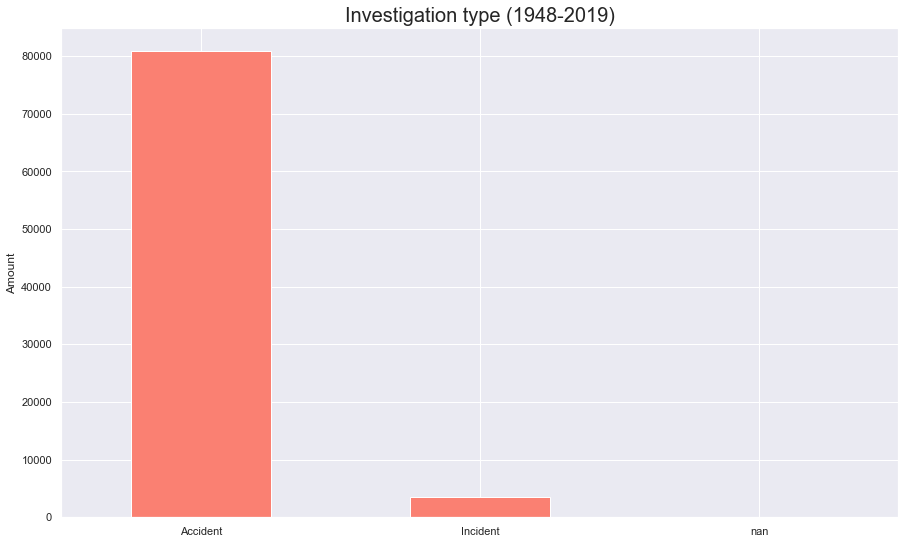

In [111]:
df["Investigation.Type"].value_counts(dropna=False).plot(kind="bar", figsize=(15,9), color="salmon")
plt.title("Investigation Type")
plt.title("Investigation type (1948-2019)", fontsize=20)
plt.ylabel("Amount")
plt.xticks(rotation="horizontal");
df["Investigation.Type"].value_counts(dropna=False)

In [8]:
df.isna().sum()

Event.Id                      0
Investigation.Type            5
Accident.Number               0
Location                     77
Country                     507
Latitude                  54099
Longitude                 54108
Airport.Code              36539
Airport.Name              33823
Injury.Severity               0
Aircraft.Damage            2709
Aircraft.Category         56754
Registration.Number        3850
Make                         70
Model                        99
Amateur.Built               609
Number.of.Engines          5034
Engine.Type                4256
FAR.Description           57056
Schedule                  72419
Purpose.of.Flight          4880
Air.Carrier               80093
Total.Fatal.Injuries      27203
Total.Serious.Injuries    29878
Total.Minor.Injuries      28670
Total.Uninjured           14589
Weather.Condition          3103
Broad.Phase.of.Flight      6608
Report.Status                 0
Publication.Date          14315
EventYear                     0
EventMon

In [9]:
df.describe(include="all")

,Event.Id,Investigation.Type,Accident.Number,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,Injury.Severity,Aircraft.Damage,Aircraft.Category,Registration.Number,Make,Model,Amateur.Built,Number.of.Engines,Engine.Type,FAR.Description,Schedule,Purpose.of.Flight,Air.Carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.Phase.of.Flight,Report.Status,Publication.Date,EventYear,EventMonth,EventDay,EventQuarter
count,84262,84257,84262,84185,83755,30163.000000,30154.000000,47723,50439,84262,81553,27508,80412,84192,84163,83653,79228.000000,80006,27206,11843,79382,4169,57059.000000,54384.000000,55592.000000,69673.000000,81159,77654,84262,69947,84262.000000,84262.000000,84262.000000,84262.000000
unique,83035,2,84262,26575,179,NaN,NaN,10019,23863,128,3,13,72557,8022,11938,2,NaN,13,18,3,22,3030,NaN,NaN,NaN,NaN,3,12,4,3956,NaN,NaN,NaN,NaN
top,20001214X45071,Accident,DEN84FA207,"ANCHORAGE, AK",United States,NaN,NaN,NONE,PRIVATE,Non-Fatal,Substantial,Airplane,NONE,CESSNA,152,No,NaN,Reciprocating,Part 91: General Aviation,UNK,Personal,UNITED AIRLINES,NaN,NaN,NaN,NaN,VMC,LANDING,Probable Cause,1993-03-31 00:00:00,NaN,NaN,NaN,NaN
freq,3,80814,1,372,78849,NaN,NaN,1473,217,63516,60839,23569,368,17782,2332,75570,NaN,68026,21600,4099,47204,49,NaN,NaN,NaN,NaN,74257,20625,77216,452,NaN,NaN,NaN,NaN
first,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1980-04-16 00:00:00,NaN,NaN,NaN,NaN
last,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-10-01 00:00:00,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,37.544907,-93.508337,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.146930,NaN,NaN,NaN,NaN,NaN,0.847614,0.331715,0.518708,5.901325,NaN,NaN,NaN,NaN,1997.993247,6.589067,3.320275,2.530678
std,NaN,NaN,NaN,NaN,NaN,12.370282,39.454412,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.447004,NaN,NaN,NaN,NaN,NaN,6.292468,1.375602,2.771339,29.534302,NaN,NaN,NaN,NaN,10.999817,3.060323,2.006084,1.011958
min,NaN,NaN,NaN,NaN,NaN,-78.016945,-178.676111,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,1948.000000,1.000000,0.000000,1.000000
25%,NaN,NaN,NaN,NaN,NaN,33.307778,-114.861042,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,1988.000000,4.000000,2.000000,2.000000


Text(0, 0.5, 'Year')

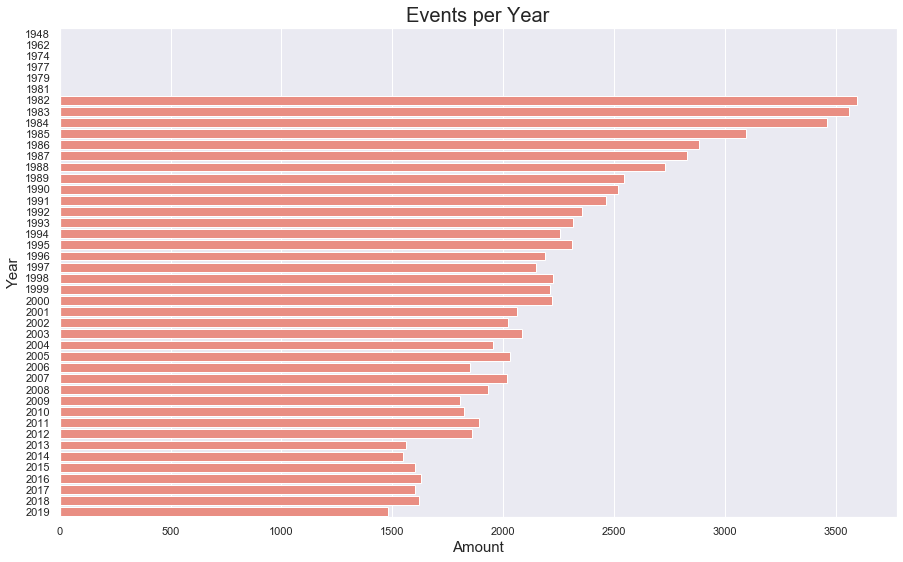

In [116]:
plt.figure(figsize=(15,9))
ax =sns.countplot(y=(df["EventYear"]), color="salmon")
plt.title("Events per Year", fontsize=20)
plt.xlabel("Amount", fontsize=15)
plt.ylabel("Year", fontsize=15)

Text(0, 0.5, 'Amount')

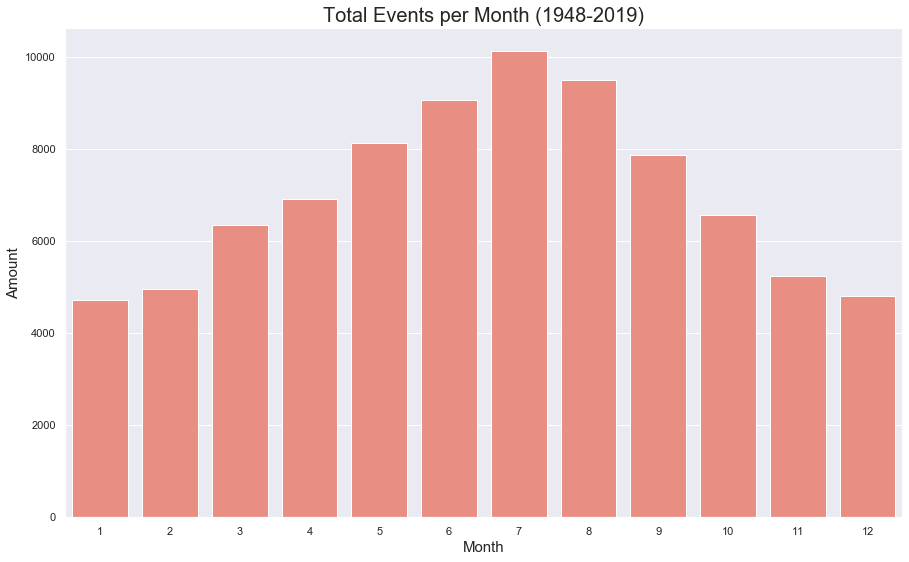

In [11]:
plt.figure(figsize=(15,9))
sns.countplot(x= df["EventMonth"], color="salmon")
plt.title("Total Events per Month (1948-2019)", fontsize=20)
plt.xlabel("Month", fontsize=15)
plt.ylabel("Amount", fontsize=15)

Text(0, 0.5, 'Amount')

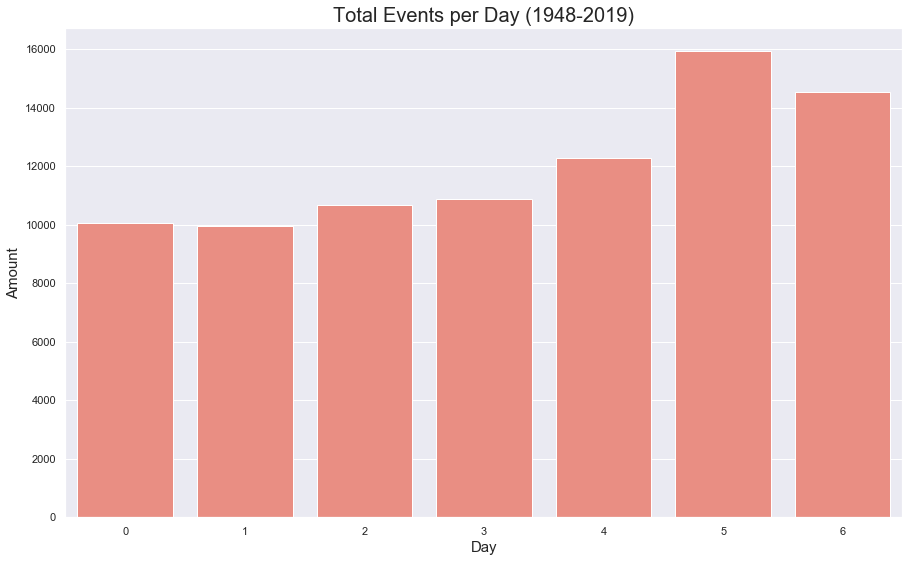

In [12]:
plt.figure(figsize=(15,9))
sns.countplot(x=df["EventDay"], color="salmon")
plt.title("Total Events per Day (1948-2019)", fontsize=20)
plt.xlabel("Day", fontsize=15)
plt.ylabel("Amount", fontsize=15)
#Monday = 0

Text(0, 0.5, 'Amount')

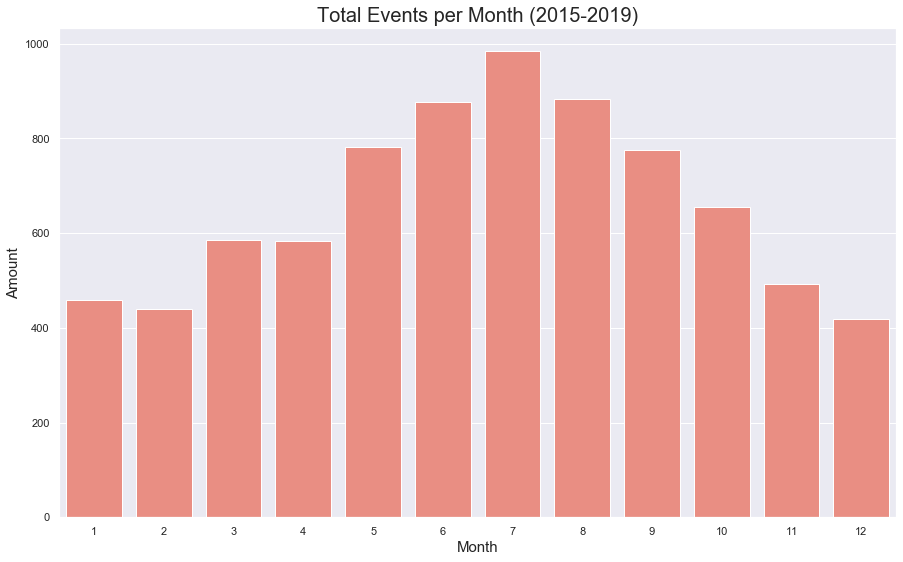

In [13]:
df2015 = df[df["EventYear"]>=2015]
plt.figure(figsize=(15,9))
sns.countplot(x=df2015["EventMonth"], color="salmon")
plt.title("Total Events per Month (2015-2019)", fontsize=20)
plt.xlabel("Month", fontsize=15)
plt.ylabel("Amount", fontsize=15)

In [14]:
df2015_table = pd.crosstab(df2015["EventMonth"], (df2015["EventYear"]))
df2015_table

EventYear,2015,2016,2017,2018,2019
EventMonth,,,,,
1,95,100,87,94,82
2,78,88,105,97,71
3,135,110,112,104,124
4,110,124,119,121,110
5,145,146,148,180,164
6,167,194,152,174,189
7,189,182,233,191,189
8,194,174,160,193,162
9,153,166,163,152,142


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text xticklabel objects>)

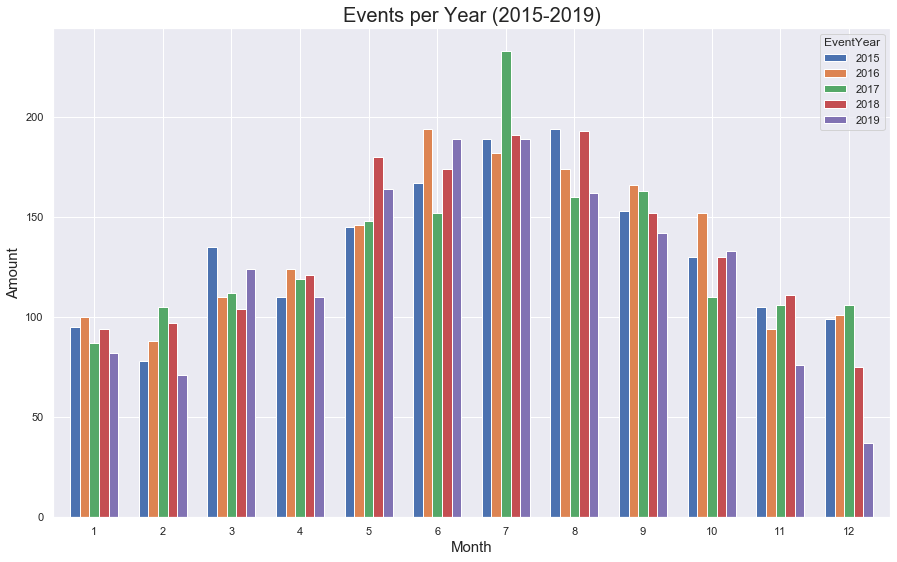

In [15]:
df2015_table.plot(kind="bar", figsize=(15,9), width=0.7)
plt.title("Events per Year (2015-2019)", fontsize=20)
plt.xlabel("Month", fontsize=15)
plt.ylabel("Amount", fontsize=15)
plt.xticks(rotation=0)

In [16]:
df["Weather.Condition"].unique()

array(['UNK', 'IMC', 'VMC', nan], dtype=object)

In [17]:
df["Weather.Condition"].value_counts()

VMC    74257
IMC     5840
UNK     1062
Name: Weather.Condition, dtype: int64

In [18]:
df["Broad.Phase.of.Flight"].unique()

array(['CRUISE', 'UNKNOWN', 'APPROACH', 'CLIMB', 'LANDING', 'TAKEOFF',
       'TAXI', 'DESCENT', 'MANEUVERING', 'STANDING', 'GO-AROUND', 'OTHER',
       nan], dtype=object)

In [19]:
df["Broad.Phase.of.Flight"].value_counts()

LANDING        20625
TAKEOFF        16272
CRUISE         11134
MANEUVERING    10367
APPROACH        8163
TAXI            2471
CLIMB           2361
DESCENT         2305
GO-AROUND       1696
STANDING        1299
UNKNOWN          793
OTHER            168
Name: Broad.Phase.of.Flight, dtype: int64

In [20]:
df_weather = pd.crosstab(df["Weather.Condition"], df["Broad.Phase.of.Flight"])
df_weather

Broad.Phase.of.Flight,APPROACH,CLIMB,CRUISE,DESCENT,GO-AROUND,LANDING,MANEUVERING,OTHER,STANDING,TAKEOFF,TAXI,UNKNOWN
Weather.Condition,,,,,,,,,,,,
IMC,1111,312,1701,257,202,505,548,4,35,540,79,61
UNK,44,26,239,25,4,68,80,3,19,62,14,105
VMC,6891,1978,8984,1986,1473,19814,9593,147,1216,15385,2334,477


(array([0, 1, 2]), <a list of 3 Text xticklabel objects>)

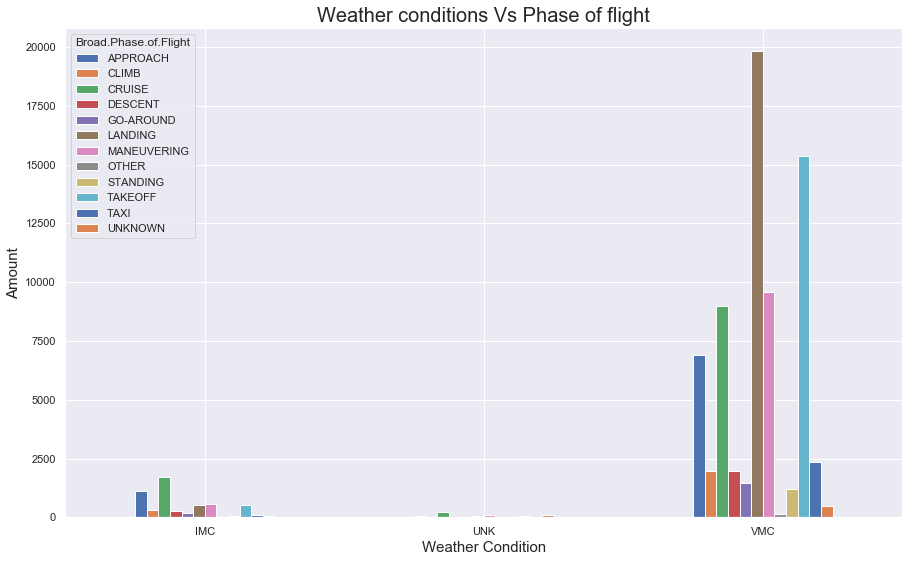

In [117]:
#VMC = visual meteorological condition
#IMC = Instrument meteorological condition
df_weather.plot(kind="bar", figsize=(15,9))
plt.title("Weather conditions Vs Phase of flight", fontsize=20)
plt.xlabel("Weather Condition", fontsize=15)
plt.ylabel("Amount", fontsize=15)
plt.xticks(rotation="horizontal")

In [22]:
df["Broad.Phase.of.Flight"].value_counts()

LANDING        20625
TAKEOFF        16272
CRUISE         11134
MANEUVERING    10367
APPROACH        8163
TAXI            2471
CLIMB           2361
DESCENT         2305
GO-AROUND       1696
STANDING        1299
UNKNOWN          793
OTHER            168
Name: Broad.Phase.of.Flight, dtype: int64

Text(0, 0.5, 'Amount')

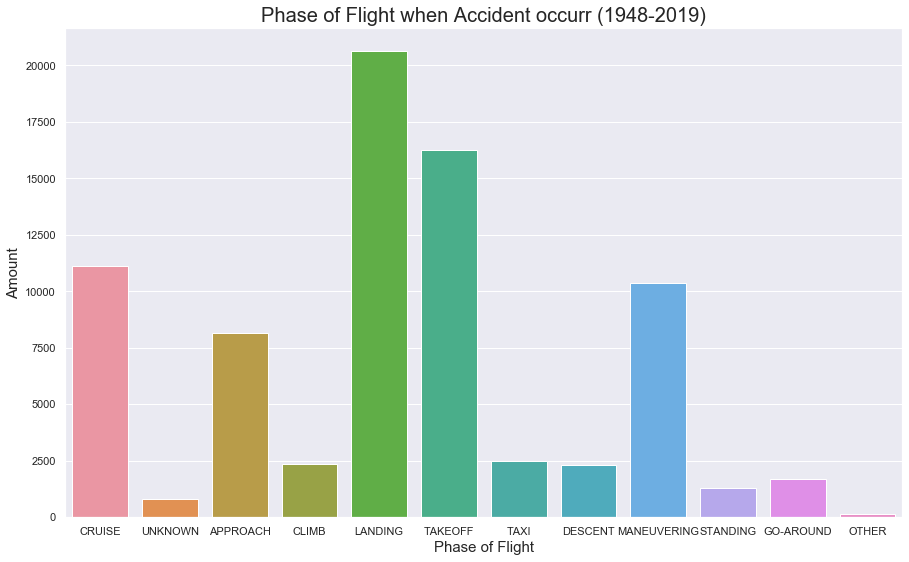

In [23]:
plt.figure(figsize=(15,9))
sns.countplot(x=df["Broad.Phase.of.Flight"])
plt.title("Phase of Flight when Accident occurr (1948-2019)", fontsize=20)
plt.xlabel("Phase of Flight", fontsize=15)
plt.ylabel("Amount", fontsize=15)

In [24]:
df["Engine.Type"].value_counts()

Reciprocating       68026
Turbo Shaft          3506
Turbo Prop           3298
Turbo Fan            2387
Unknown              2055
Turbo Jet             704
None                   16
Electric                8
REC, TJ, TJ             2
REC, ELEC               1
REC, TJ, REC, TJ        1
TJ, REC, REC, TJ        1
Hybrid Rocket           1
Name: Engine.Type, dtype: int64

Text(0, 0.5, 'Amount')

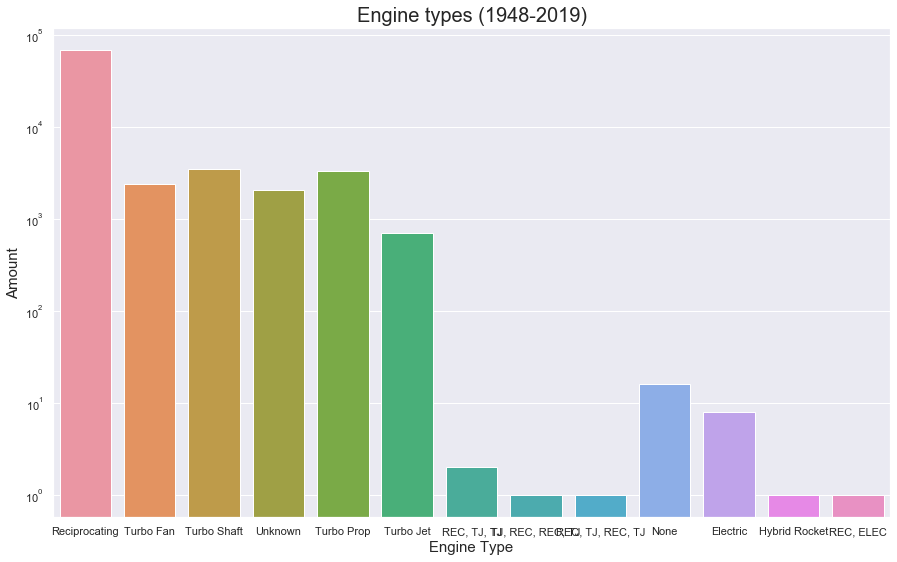

In [25]:
plt.figure(figsize=(15,9))
ax = sns.countplot(x=df["Engine.Type"])
ax.set(yscale="log")
plt.title("Engine types (1948-2019)", fontsize=20)
plt.xlabel("Engine Type", fontsize=15)
plt.ylabel("Amount", fontsize=15)

Text(0, 0.5, 'Amount')

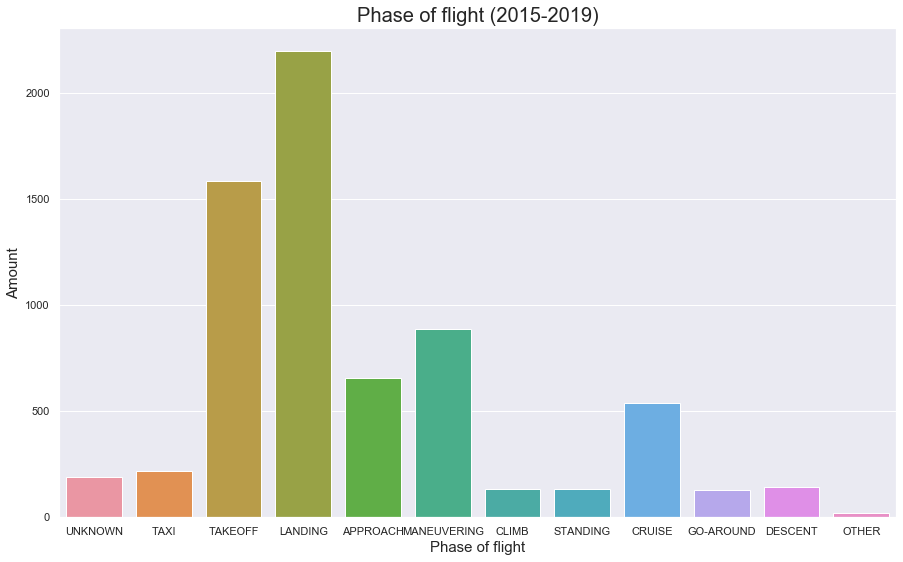

In [118]:
plt.figure(figsize=(15,9))
sns.countplot(x=df2015["Broad.Phase.of.Flight"])
plt.title("Phase of flight (2015-2019)", fontsize=20)
plt.xlabel("Phase of flight", fontsize=15)
plt.ylabel("Amount", fontsize=15)

In [27]:
df_broad = pd.crosstab(df["Broad.Phase.of.Flight"], df["Engine.Type"])
df_broad

Engine.Type,Electric,Hybrid Rocket,None,"REC, ELEC","REC, TJ, TJ",Reciprocating,"TJ, REC, REC, TJ",Turbo Fan,Turbo Jet,Turbo Prop,Turbo Shaft,Unknown
Broad.Phase.of.Flight,,,,,,,,,,,,
APPROACH,2,0,2,0,0,6688,0,220,85,423,244,260
CLIMB,0,0,0,0,0,1831,0,176,48,166,63,34
CRUISE,2,0,1,0,0,9417,0,276,73,316,705,126
DESCENT,1,0,1,0,0,1767,0,167,47,131,67,65
GO-AROUND,0,0,0,0,0,1586,0,15,10,48,10,6
LANDING,1,0,6,0,0,18162,0,407,143,608,374,420
MANEUVERING,1,0,2,0,2,8286,0,29,40,518,1128,140
OTHER,0,1,0,0,0,106,0,8,2,16,13,8
STANDING,0,0,1,0,0,816,0,144,38,104,141,16


Text(0, 0.5, 'Amount')

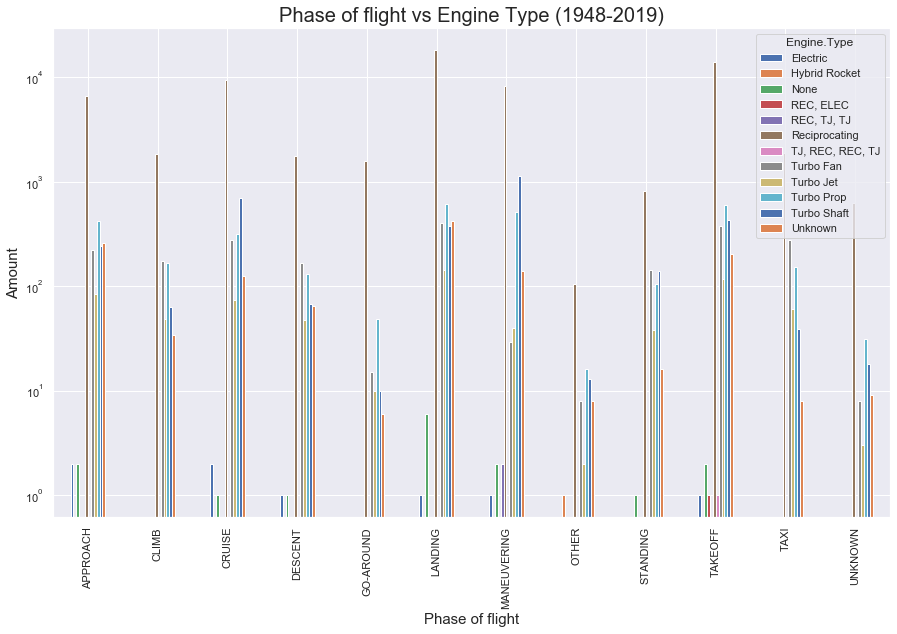

In [28]:
ax = df_broad.plot(kind="bar", figsize=(15,9))
ax.set(yscale="log")
plt.title("Phase of flight vs Engine Type (1948-2019)", fontsize=20)
plt.xlabel("Phase of flight", fontsize=15)
plt.ylabel("Amount", fontsize=15)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 <a list of 20 Text xticklabel objects>)

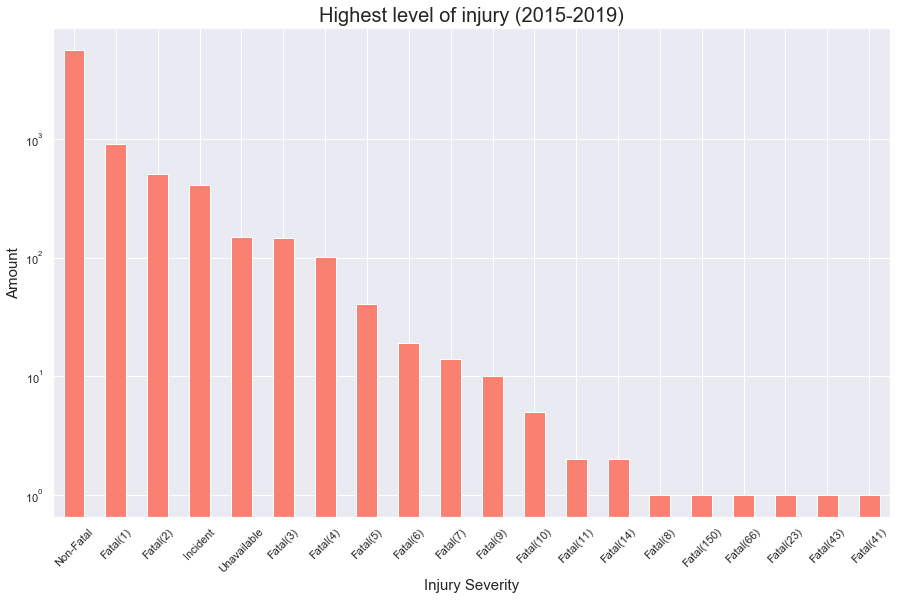

In [119]:
ax = df2015["Injury.Severity"].value_counts().nlargest(20).plot(kind="bar", figsize=(15,9), color="salmon")
ax.set(yscale="log")
plt.title("Highest level of injury (2015-2019)", fontsize=20)
plt.xlabel("Injury Severity", fontsize=15)
plt.ylabel("Amount", fontsize=15)
plt.xticks(rotation=45)

In [34]:
df_aircraft = pd.crosstab(df["Aircraft.Category"], df["Aircraft.Damage"])
df_aircraft

Aircraft.Damage,Destroyed,Minor,Substantial
Aircraft.Category,,,
Airplane,3035,818,18750
Balloon,13,37,66
Blimp,1,0,3
Glider,34,10,407
Gyrocraft,13,1,75
Gyroplane,9,0,50
Helicopter,475,58,2319
Powered Parachute,3,5,52
Powered-Lift,1,1,2


Text(111.453125, 0.5, 'Aircraft type')

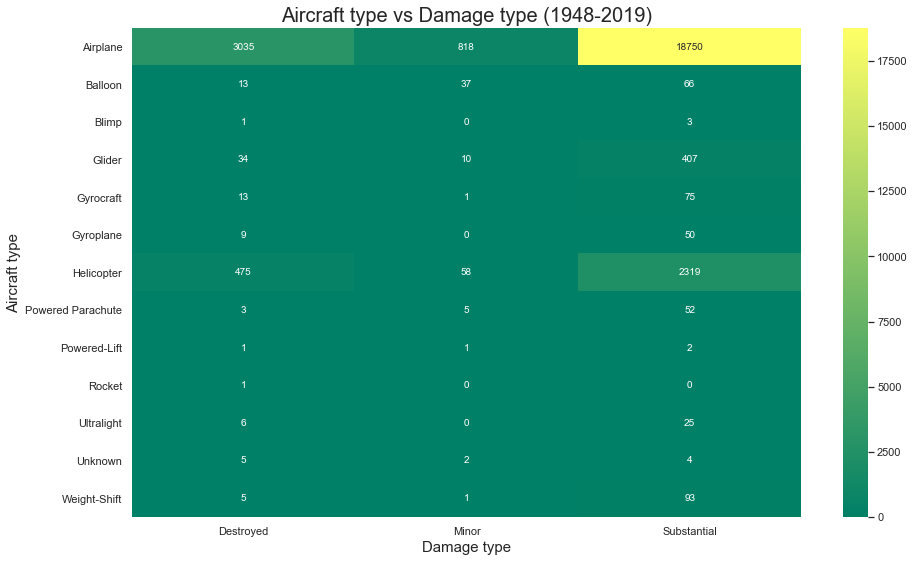

In [35]:
plt.figure(figsize=(15,9))
sns.heatmap(df_aircraft, annot=True, fmt="d", cmap="summer")
plt.title("Aircraft type vs Damage type (1948-2019)", fontsize=20)
plt.xlabel("Damage type", fontsize=15)
plt.ylabel("Aircraft type", fontsize=15)

In [36]:
df_aircraft_fatal = df[df["Total.Fatal.Injuries"]<=15]
df_aircraft_fatal = pd.crosstab(df_aircraft_fatal["Total.Fatal.Injuries"], df_aircraft_fatal["Aircraft.Category"])
df_aircraft_fatal

Aircraft.Category,Airplane,Balloon,Glider,Gyrocraft,Gyroplane,Helicopter,Powered Parachute,Rocket,Ultralight,Unknown,Weight-Shift
Total.Fatal.Injuries,,,,,,,,,,,
0.0,2735,30,46,13,0,272,0,0,0,0,0
1.0,2170,9,63,16,8,304,7,1,7,3,23
2.0,1300,1,8,3,2,171,0,0,3,0,3
3.0,384,2,3,0,0,98,0,0,0,0,0
4.0,283,1,0,0,0,49,0,0,0,1,0
5.0,99,0,0,0,0,22,0,0,0,0,0
6.0,62,0,0,0,0,6,0,0,0,0,0
7.0,39,0,0,0,0,8,0,0,0,1,0
8.0,20,0,0,0,0,3,0,0,0,0,0


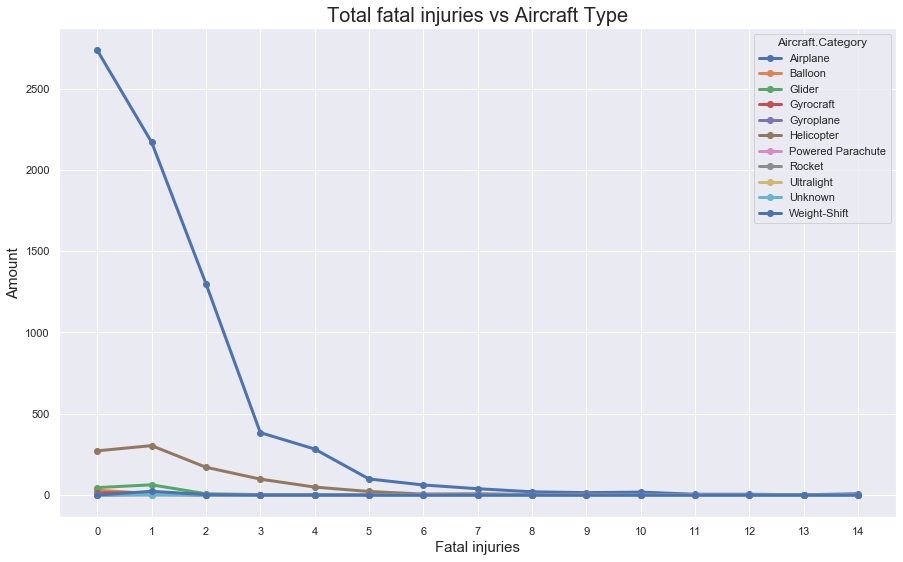

In [37]:
df_aircraft_fatal.plot(figsize=(15,9), linewidth=3, marker="o")
plt.title("Total fatal injuries vs Aircraft Type", fontsize=20)
plt.xlabel("Fatal injuries", fontsize=15)
plt.ylabel("Amount", fontsize=15)
plt.xticks(np.arange(0,15));

In [38]:
df.columns

Index(['Event.Id', 'Investigation.Type', 'Accident.Number', 'Location',
       'Country', 'Latitude', 'Longitude', 'Airport.Code', 'Airport.Name',
       'Injury.Severity', 'Aircraft.Damage', 'Aircraft.Category',
       'Registration.Number', 'Make', 'Model', 'Amateur.Built',
       'Number.of.Engines', 'Engine.Type', 'FAR.Description', 'Schedule',
       'Purpose.of.Flight', 'Air.Carrier', 'Total.Fatal.Injuries',
       'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured',
       'Weather.Condition', 'Broad.Phase.of.Flight', 'Report.Status',
       'Publication.Date', 'EventYear', 'EventMonth', 'EventDay',
       'EventQuarter'],
      dtype='object')

In [39]:
df_temp_injury = df.loc[:, ['Aircraft.Category','Total.Fatal.Injuries','Total.Serious.Injuries',
                            'Total.Minor.Injuries', 'Total.Uninjured']]
df_temp_injury

,Aircraft.Category,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured
84261,NaN,2.0,0.0,0.0,0.0
84260,NaN,4.0,0.0,0.0,0.0
84259,NaN,3.0,NaN,NaN,NaN
84258,NaN,2.0,0.0,0.0,0.0
84257,NaN,1.0,2.0,NaN,NaN
...,...,...,...,...,...
4,NaN,NaN,NaN,NaN,NaN
3,Airplane,NaN,NaN,NaN,1.0
2,Airplane,NaN,NaN,NaN,2.0
1,Airplane,2.0,NaN,NaN,NaN


In [40]:
df_temp_injury["Aircraft.Category"].unique()

array([nan, 'Airplane', 'Helicopter', 'Glider', 'Balloon', 'Gyrocraft',
       'Ultralight', 'Unknown', 'Blimp', 'Powered-Lift',
       'Powered Parachute', 'Weight-Shift', 'Gyroplane', 'Rocket'],
      dtype=object)

In [41]:
rows=['Airplane', 'Helicopter', 'Glider',]
df_temp_injury = df_temp_injury.drop(df_temp_injury[df_temp_injury["Aircraft.Category"].isin(rows)].index.tolist())
df_temp_injury = df_temp_injury[df["Aircraft.Category"].notna()]
df_temp_injury

C:\Users\Aldo\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


,Aircraft.Category,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured
84012,Balloon,0.0,0.0,0.0,2.0
83902,Balloon,0.0,0.0,0.0,3.0
83836,Balloon,0.0,1.0,1.0,2.0
83820,Balloon,0.0,0.0,1.0,4.0
83773,Balloon,0.0,1.0,1.0,2.0
...,...,...,...,...,...
153,Gyroplane,NaN,NaN,NaN,1.0
123,Ultralight,2.0,NaN,NaN,NaN
100,Gyroplane,1.0,NaN,NaN,NaN
26,Gyroplane,NaN,1.0,NaN,NaN


In [42]:
df_temp_injury["Aircraft.Category"].unique()

array(['Balloon', 'Gyrocraft', 'Ultralight', 'Unknown', 'Blimp',
       'Powered-Lift', 'Powered Parachute', 'Weight-Shift', 'Gyroplane',
       'Rocket'], dtype=object)

In [43]:
# Test cell for plot with less data.
df_temp_injury = pd.melt(df_temp_injury, "Aircraft.Category", var_name="Injuries")
# df_temp_injury = df_temp_injury.sample(frac=0.01, random_state=42)
df_temp_injury

,Aircraft.Category,Injuries,value
0,Balloon,Total.Fatal.Injuries,0.0
1,Balloon,Total.Fatal.Injuries,0.0
2,Balloon,Total.Fatal.Injuries,0.0
3,Balloon,Total.Fatal.Injuries,0.0
4,Balloon,Total.Fatal.Injuries,0.0
...,...,...,...
2263,Gyroplane,Total.Uninjured,1.0
2264,Ultralight,Total.Uninjured,NaN
2265,Gyroplane,Total.Uninjured,NaN
2266,Gyroplane,Total.Uninjured,NaN


In [44]:
df_temp_injury = df_temp_injury[df_temp_injury["value"].notna()]
df_temp_injury

,Aircraft.Category,Injuries,value
0,Balloon,Total.Fatal.Injuries,0.0
1,Balloon,Total.Fatal.Injuries,0.0
2,Balloon,Total.Fatal.Injuries,0.0
3,Balloon,Total.Fatal.Injuries,0.0
4,Balloon,Total.Fatal.Injuries,0.0
...,...,...,...
2251,Balloon,Total.Uninjured,4.0
2256,Gyroplane,Total.Uninjured,1.0
2257,Gyroplane,Total.Uninjured,1.0
2262,Balloon,Total.Uninjured,1.0


Wall time: 2.11 s


Text(0, 0.5, 'Amount')

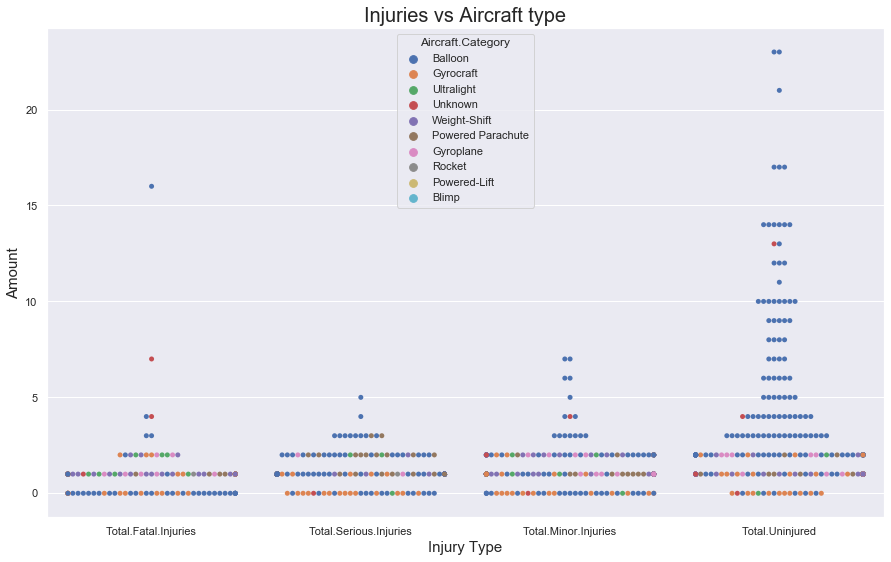

In [45]:
%%time
plt.figure(figsize=(15,9))
sns.swarmplot(x="Injuries", y= "value", hue="Aircraft.Category", data=df_temp_injury)
plt.title("Injuries vs Aircraft type", fontsize=20)
plt.xlabel("Injury Type", fontsize=15)
plt.ylabel("Amount",fontsize=15)

In [46]:
df_temp_injury = df.loc[:, ['Aircraft.Category','Total.Fatal.Injuries','Total.Serious.Injuries',
                            'Total.Minor.Injuries', 'Total.Uninjured']]
rows=['Balloon', 'Gyrocraft','Ultralight', 'Unknown', 'Blimp', 'Powered-Lift',
       'Powered Parachute', 'Weight-Shift', 'Gyroplane', 'Rocket']
df_temp_injury = df_temp_injury.drop(df_temp_injury[df_temp_injury["Aircraft.Category"].isin(rows)].index.tolist())
df_temp_injury = df_temp_injury[df["Aircraft.Category"].notna()]
df_temp_injury

C:\Users\Aldo\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


,Aircraft.Category,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured
84256,Airplane,NaN,NaN,1.0,44.0
84251,Airplane,0.0,0.0,0.0,2.0
84250,Airplane,0.0,0.0,0.0,2.0
84239,Airplane,0.0,0.0,0.0,1.0
84240,Helicopter,0.0,0.0,0.0,2.0
...,...,...,...,...,...
5,Airplane,5.0,2.0,2.0,NaN
3,Airplane,NaN,NaN,NaN,1.0
2,Airplane,NaN,NaN,NaN,2.0
1,Airplane,2.0,NaN,NaN,NaN


In [47]:
df_temp_injury = pd.melt(df_temp_injury, "Aircraft.Category", var_name="Injuries")
df_temp_injury

,Aircraft.Category,Injuries,value
0,Airplane,Total.Fatal.Injuries,NaN
1,Airplane,Total.Fatal.Injuries,0.0
2,Airplane,Total.Fatal.Injuries,0.0
3,Airplane,Total.Fatal.Injuries,0.0
4,Helicopter,Total.Fatal.Injuries,0.0
...,...,...,...
107759,Airplane,Total.Uninjured,NaN
107760,Airplane,Total.Uninjured,1.0
107761,Airplane,Total.Uninjured,2.0
107762,Airplane,Total.Uninjured,NaN


In [48]:
df_temp_injury = df_temp_injury[df_temp_injury["value"].notna()]
df_temp_injury

,Aircraft.Category,Injuries,value
1,Airplane,Total.Fatal.Injuries,0.0
2,Airplane,Total.Fatal.Injuries,0.0
3,Airplane,Total.Fatal.Injuries,0.0
4,Helicopter,Total.Fatal.Injuries,0.0
5,Airplane,Total.Fatal.Injuries,0.0
...,...,...,...
107754,Helicopter,Total.Uninjured,1.0
107758,Helicopter,Total.Uninjured,2.0
107760,Airplane,Total.Uninjured,1.0
107761,Airplane,Total.Uninjured,2.0


In [49]:
df_temp_injury = df_temp_injury.sample(frac=0.1, random_state=42)
df_temp_injury

,Aircraft.Category,Injuries,value
99503,Airplane,Total.Uninjured,1.0
83585,Airplane,Total.Uninjured,0.0
83612,Airplane,Total.Uninjured,3.0
83037,Airplane,Total.Uninjured,3.0
81372,Airplane,Total.Uninjured,1.0
...,...,...,...
89234,Airplane,Total.Uninjured,51.0
99148,Airplane,Total.Uninjured,1.0
38185,Airplane,Total.Serious.Injuries,1.0
46321,Airplane,Total.Serious.Injuries,1.0


Wall time: 4min 10s


Text(0, 0.5, 'Amount')

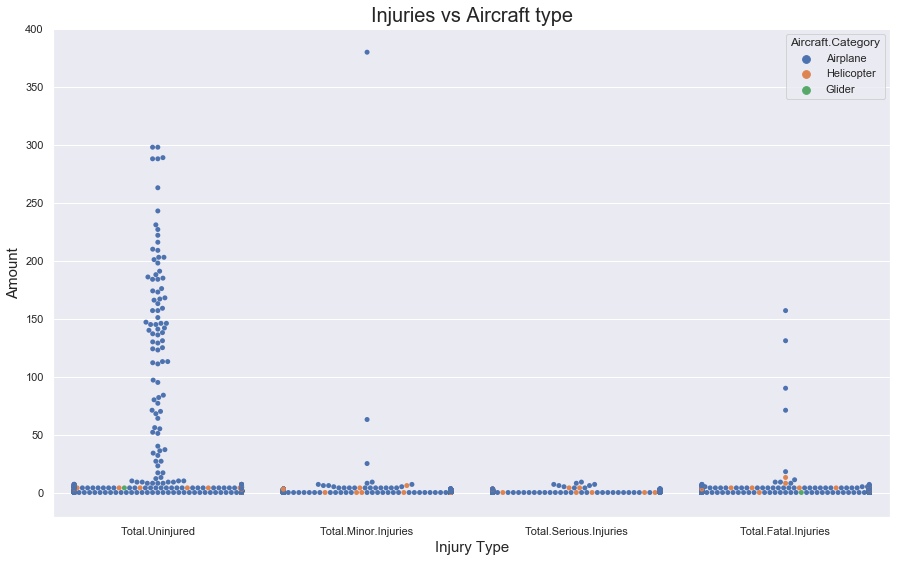

In [142]:
%%time
plt.figure(figsize=(15,9))
sns.swarmplot(x="Injuries", y="value", hue="Aircraft.Category", data=df_temp_injury)
plt.title("Injuries vs Aircraft type", fontsize=20)
plt.xlabel("Injury Type", fontsize=15)
plt.ylabel("Amount",fontsize=15)

In [76]:
df_make = df["Make"].str.upper()
df_make.value_counts().nlargest(20)

CESSNA               26073
PIPER                14230
BEECH                 5148
BELL                  2598
BOEING                2349
MOONEY                1272
GRUMMAN               1152
ROBINSON              1124
BELLANCA              1020
HUGHES                 913
SCHWEIZER              751
AIR TRACTOR            642
AERONCA                601
MCDONNELL DOUGLAS      595
MAULE                  562
CHAMPION               490
STINSON                419
AERO COMMANDER         419
DE HAVILLAND           414
LUSCOMBE               401
Name: Make, dtype: int64

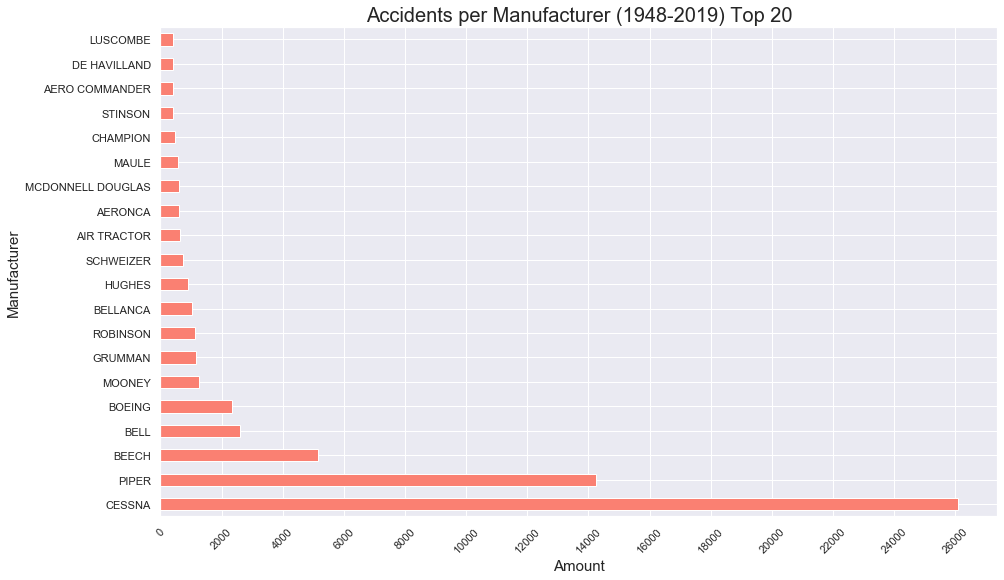

In [101]:
plt.figure(figsize=(15,9))
ax = df_make.value_counts(ascending=False).nlargest(20).plot(kind="barh", color="salmon")
plt.title("Accidents per Manufacturer (1948-2019) Top 20", fontsize=20)
plt.ylabel("Manufacturer", fontsize=15)
plt.xlabel("Amount", fontsize=15)
plt.xticks(np.arange(0,28000,2000), rotation=45);

In [97]:
df_make_2015 = df2015["Make"].str.upper()
df_make_2015.value_counts().nlargest(20)

CESSNA                         1958
PIPER                          1089
BEECH                           421
BOEING                          288
BELL                            219
ROBINSON                        158
MOONEY                           95
AIRBUS                           88
ROBINSON HELICOPTER              69
CIRRUS                           68
CIRRUS DESIGN CORP               68
AIR TRACTOR INC                  65
VANS                             63
AIR TRACTOR                      60
ROBINSON HELICOPTER COMPANY      57
BELLANCA                         56
CHAMPION                         55
HUGHES                           55
MAULE                            55
AERONCA                          52
Name: Make, dtype: int64

Text(0.5, 0, 'Amount')

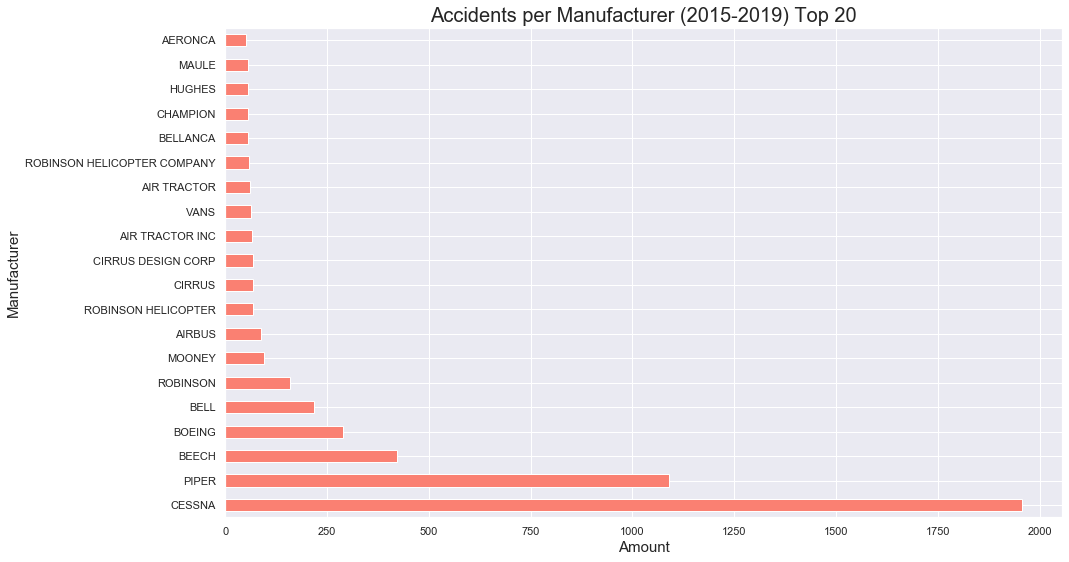

In [120]:
plt.figure(figsize=(15,9))
df_make_2015.value_counts(ascending=False).nlargest(20).plot(kind="barh", color="salmon")
plt.title("Accidents per Manufacturer (2015-2019) Top 20", fontsize=20)
plt.ylabel("Manufacturer", fontsize=15)
plt.xlabel("Amount", fontsize=15)